The purpose of this Notebook is to:

- do some preprocessing of the original datasets, calculating mostly the retention rates and the rate of variation of retention rates
- perform an EDA to build some intuition about the dataset

## Imports

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import product
import warnings
warnings.filterwarnings("ignore")


In [4]:
df_1= pd.read_csv('dataset_1.csv',parse_dates=[0])
print(f"Shape: {df_1.shape}\n\ndtypes:\n{df_1.dtypes}\n")
df_1.head()

Shape: (252, 4)

dtypes:
Date       datetime64[ns]
Country            object
Product            object
Intake              int64
dtype: object



,Date,Country,Product,Intake
0,2019-01-31,US,A,110
1,2019-02-28,US,A,86
2,2019-03-31,US,A,92
3,2019-04-30,US,A,113
4,2019-05-31,US,A,124


In [5]:
df_1.shape,df_1.dtypes

((252, 4),
 Date       datetime64[ns]
 Country            object
 Product            object
 Intake              int64
 dtype: object)

In [6]:
df_2 = pd.read_csv('dataset_2.csv',parse_dates=[0,1])
print(f"Shape: {df_2.shape}\n\ndtypes:\n{df_2.dtypes}\n")
df_2.head()

Shape: (3654, 5)

dtypes:
Date             datetime64[ns]
Intake Month     datetime64[ns]
Country                  object
Product                  object
Net Customers             int64
dtype: object



,Date,Intake Month,Country,Product,Net Customers
0,2019-01-31,2019-01-31,US,A,110
1,2019-02-28,2019-01-31,US,A,88
2,2019-03-31,2019-01-31,US,A,83
3,2019-04-30,2019-01-31,US,A,77
4,2019-05-31,2019-01-31,US,A,75


# Preprocessing

In [7]:
#df_2['months_since_acquisition'] = ((df_2['Date'] - df_2['Intake Month'])/np.timedelta64(1, 'M')).map(lambda x : np.round(x)).astype('int') #doesn't work because of rounding issues

def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month

# Get the integers for the date parts from the 'InvoiceMonth' column
date_year, date_month = get_date_int(df_2, 'Date')

# Get the integers for date parts from the 'Cohortmonth' column
cohort_year, cohort_month = get_date_int(df_2, 'Intake Month')

# Calculate difference in years
years_diff = date_year - cohort_year

# Calculate difference in months
months_diff = date_month - cohort_month

# Extract the difference in months from all previous values

df_2['months_since_acquisition'] = years_diff * 12 + months_diff
df_2.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
0,2019-01-31,2019-01-31,US,A,110,0
1,2019-02-28,2019-01-31,US,A,88,1
2,2019-03-31,2019-01-31,US,A,83,2
3,2019-04-30,2019-01-31,US,A,77,3
4,2019-05-31,2019-01-31,US,A,75,4


In [8]:
df_2[(df_2['Intake Month']=='2019-01-31')&(df_2.Product=='A')&(df_2.Country=='CA')]

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition
1218,2019-01-31,2019-01-31,CA,A,17,0
1219,2019-02-28,2019-01-31,CA,A,13,1
1220,2019-03-31,2019-01-31,CA,A,12,2
1221,2019-04-30,2019-01-31,CA,A,12,3
1222,2019-05-31,2019-01-31,CA,A,11,4
1223,2019-06-30,2019-01-31,CA,A,11,5
1224,2019-07-31,2019-01-31,CA,A,11,6
1225,2019-08-31,2019-01-31,CA,A,11,7
1226,2019-09-30,2019-01-31,CA,A,10,8
1227,2019-10-31,2019-01-31,CA,A,10,9


In [9]:
df_2['churn_customers'] = df_2.groupby(['Country','Product','Intake Month'])['Net Customers'].diff().abs().fillna(0)
df_2.head(10)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers
0,2019-01-31,2019-01-31,US,A,110,0,0.0
1,2019-02-28,2019-01-31,US,A,88,1,22.0
2,2019-03-31,2019-01-31,US,A,83,2,5.0
3,2019-04-30,2019-01-31,US,A,77,3,6.0
4,2019-05-31,2019-01-31,US,A,75,4,2.0
5,2019-06-30,2019-01-31,US,A,72,5,3.0
6,2019-07-31,2019-01-31,US,A,71,6,1.0
7,2019-08-31,2019-01-31,US,A,70,7,1.0
8,2019-09-30,2019-01-31,US,A,69,8,1.0
9,2019-10-31,2019-01-31,US,A,69,9,0.0


In [10]:
df_2['Date_month'] = df_2['Date'].dt.month
df_2['Date_year'] = df_2['Date'].dt.year
df_2['Cohort_month'] = df_2['Intake Month'].dt.month
df_2['Cohort_year'] = df_2['Intake Month'].dt.year
df_2

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
3649,2021-03-31,2021-02-28,GB,C,47,1,13.0,3,2021,2,2021
3650,2021-04-30,2021-02-28,GB,C,44,2,3.0,4,2021,2,2021
3651,2021-03-31,2021-03-31,GB,C,61,0,0.0,3,2021,3,2021
3652,2021-04-30,2021-03-31,GB,C,44,1,17.0,4,2021,3,2021


In [11]:
#get cohort size
df = df_2.merge(df_1,how='left',left_on=['Intake Month','Country','Product'],right_on=['Date','Country','Product'])
df = df.drop(["Date_y"],axis=1).rename(columns={'Date_x':"Date","Intake":"Cohort_size"})
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110


In [12]:
df['Cohort_name'] = df['Intake Month'].dt.strftime('%b-%y')
df['retention_rate'] = 100 * df['Net Customers'] / df['Cohort_size']
df['diff_retention_rate'] = df.groupby(['Product','Country','Intake Month'])['retention_rate'].diff()

# #we fillna with 0 but only on the ones where there is a retention rate (ex: for B Product, there is no retention rate so we keep NaN)
df.loc[~df['retention_rate'].isnull(),'diff_retention_rate'] = df.loc[~df['retention_rate'].isnull(),'diff_retention_rate'].fillna(0)
df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,diff_retention_rate
0,2019-01-31,2019-01-31,US,A,110,0,0.0,1,2019,1,2019,110,Jan-19,100.000000,0.000000
1,2019-02-28,2019-01-31,US,A,88,1,22.0,2,2019,1,2019,110,Jan-19,80.000000,-20.000000
2,2019-03-31,2019-01-31,US,A,83,2,5.0,3,2019,1,2019,110,Jan-19,75.454545,-4.545455
3,2019-04-30,2019-01-31,US,A,77,3,6.0,4,2019,1,2019,110,Jan-19,70.000000,-5.454545
4,2019-05-31,2019-01-31,US,A,75,4,2.0,5,2019,1,2019,110,Jan-19,68.181818,-1.818182


In [13]:
df.shape

(3654, 15)

In [14]:
df['retention_rate_last'] = df.groupby(['Product','Country','Intake Month'])['retention_rate'].transform('min')
df['months_since_acquisition_last'] = df.groupby(['Product','Country','Intake Month'])['months_since_acquisition'].transform('max')
df['Type'] = 'actual'
df.shape

(3654, 18)

### Save output file

In [15]:
df.to_csv('df_actuals.csv',index=False)

## EDA

In this section we do a quick EDA to build some intuition. We we will see that the retention rate depends mainly on:

- age of cohort (month since acquisition Date) => the main dependence is on this
                => even more, it tends to become stable (no significant change) after the first 6 months
- Product
- Country
- how recent it is ("date of acquisition")
- the month it has been acquired (specially, Product B)

## Retention rate vs age Cohort (month since acquisition)

In [16]:
PRODUCT = 'B'
COUNTRY = 'CA'

mask = (df['Product']==PRODUCT) & (df['Country']==COUNTRY) #(df_2['Intake Month']==INTAKE_MONTH) & 

mini_df = df.loc[mask,:]
# mini_df = df.copy()
mini_df.head()

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,diff_retention_rate,retention_rate_last,months_since_acquisition_last,Type
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,2,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,3,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1627,2019-04-30,2019-01-31,CA,B,0,3,0.0,4,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1628,2019-05-31,2019-01-31,CA,B,0,4,0.0,5,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual


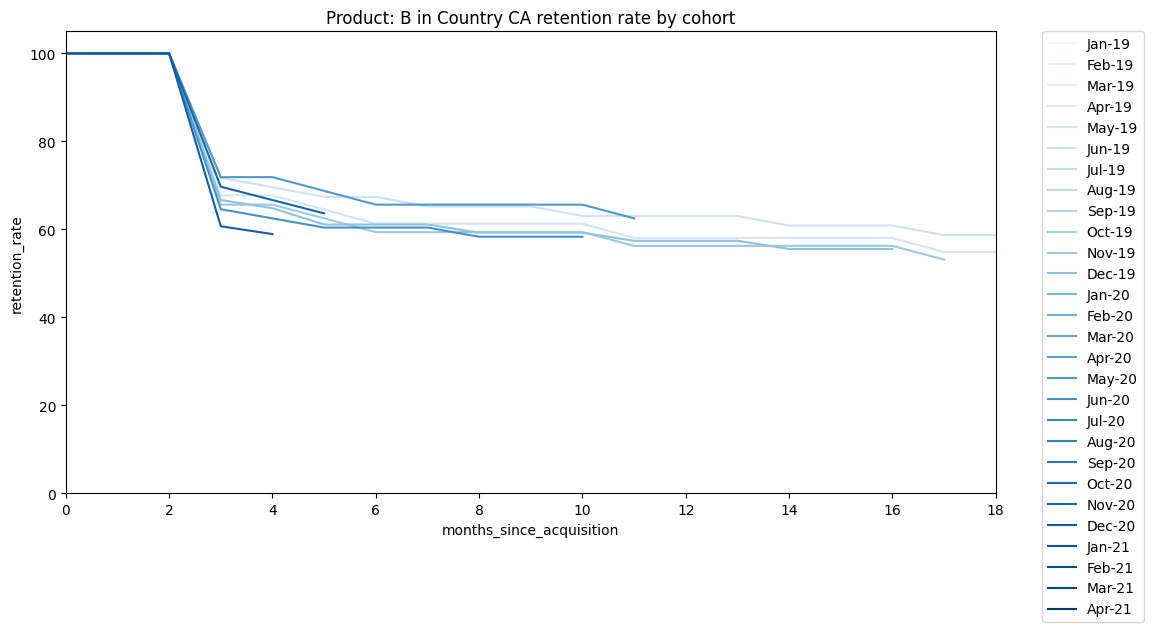

In [17]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df,hue='Cohort_name',x='months_since_acquisition',y='retention_rate',palette='Blues',ci=None)
g.set_title(TITLE)
g.set(ylim=(0, 105))
g.set(xlim=(0, 18))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

We can see above that the there is a clear relationship between the retention rate and the age of the cohort and the retention rate rate of change is relatively stable after the first 6 months

## Retention rate vs Product

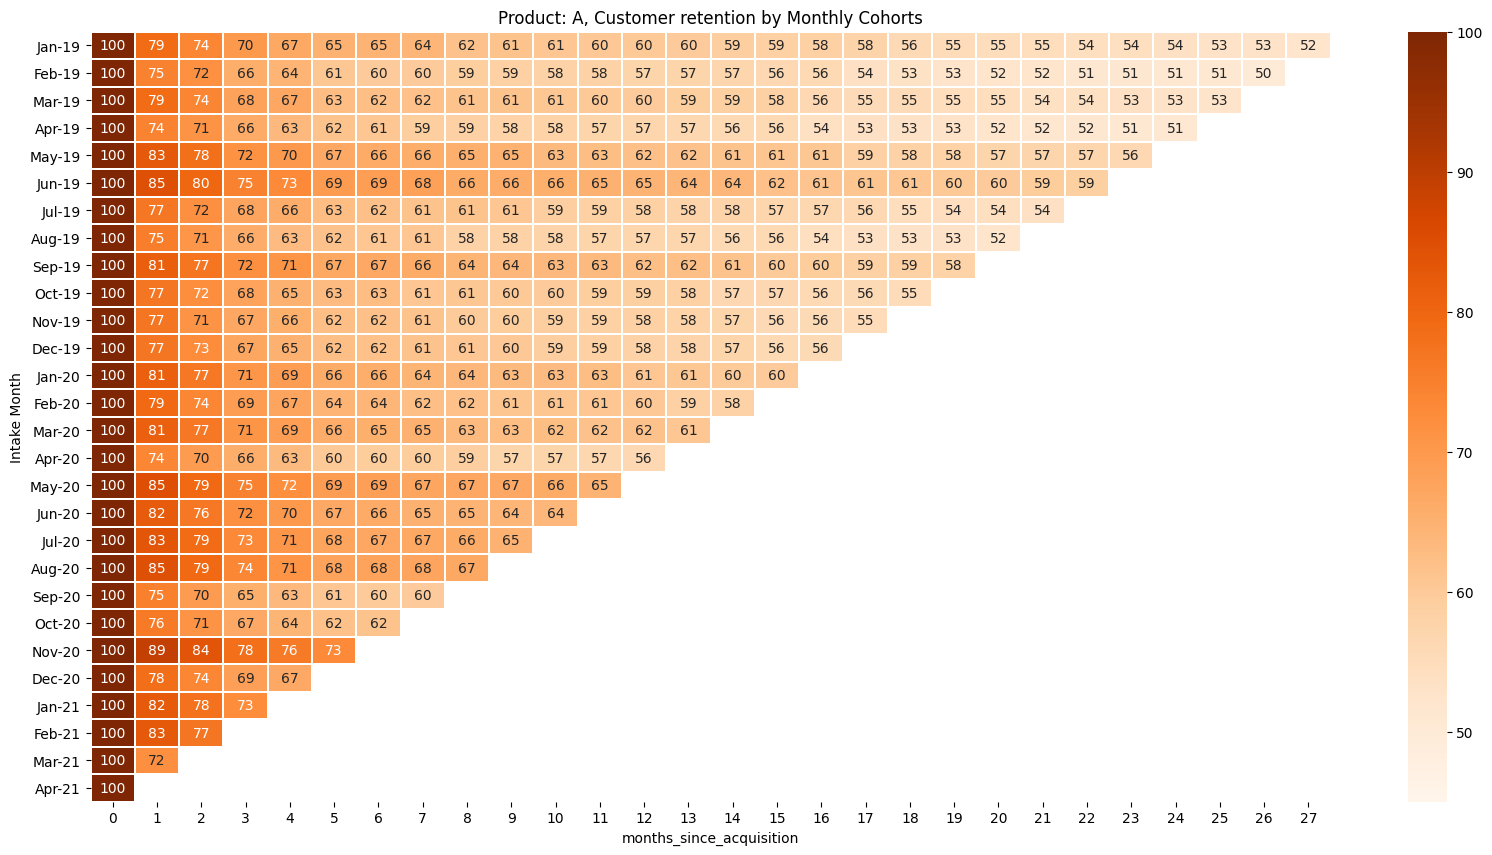

In [18]:
PRODUCT = 'A'

tmp3 = df.groupby(['Product','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp3 = tmp3[tmp3.Product==PRODUCT].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Product: {PRODUCT}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp3,
annot = True,
cmap = 'Oranges',
# cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp3.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

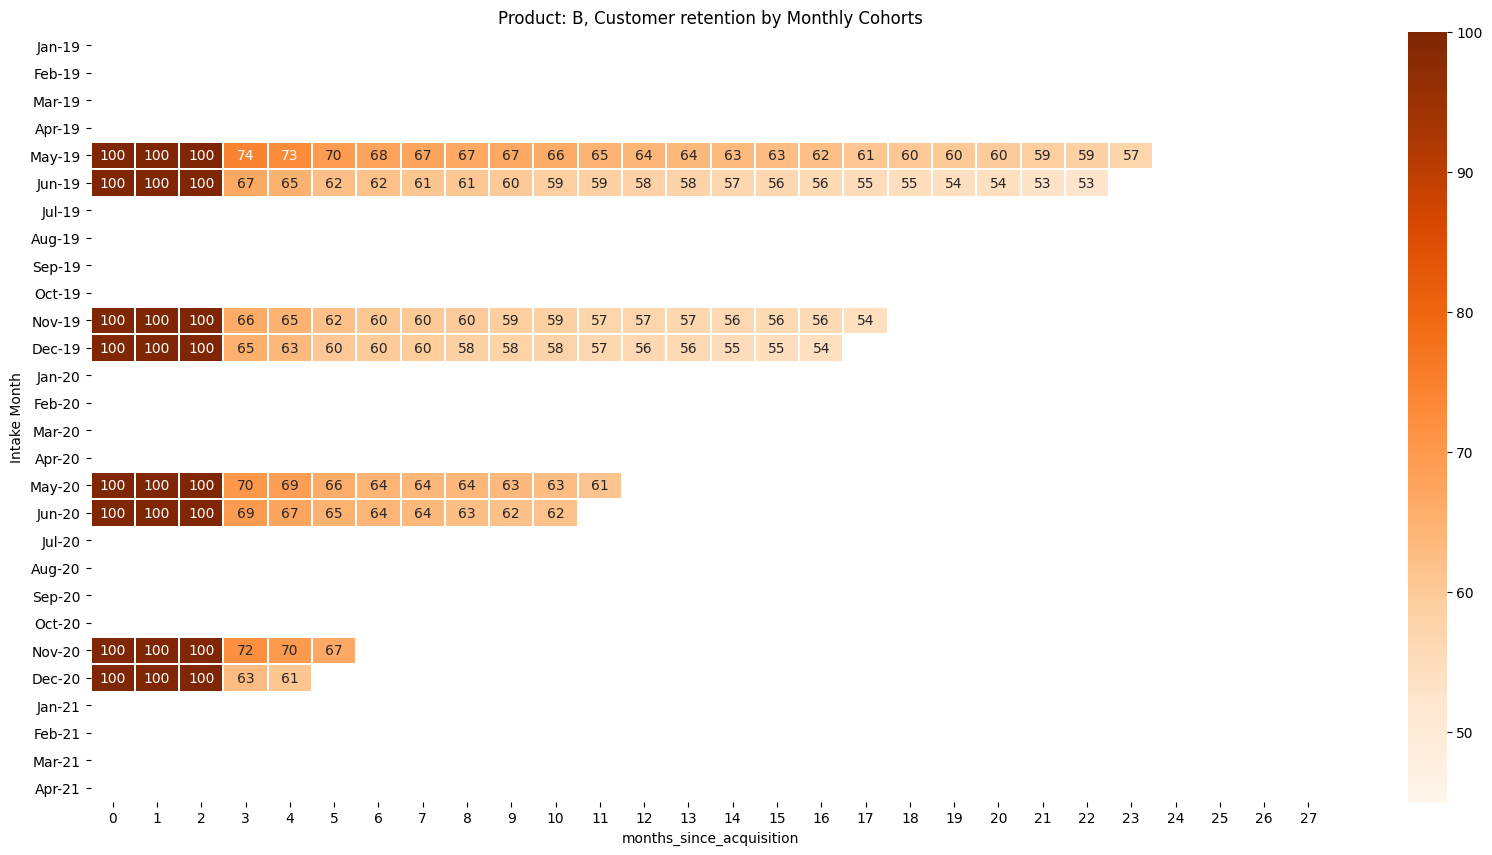

In [19]:
PRODUCT = 'B'

tmp3 = df.groupby(['Product','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp3 = tmp3[tmp3.Product==PRODUCT].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Product: {PRODUCT}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp3,
annot = True,
cmap = 'Oranges',
# cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp3.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

The histogram is clearly different from Product A to Product B

## Retention rate vs Country

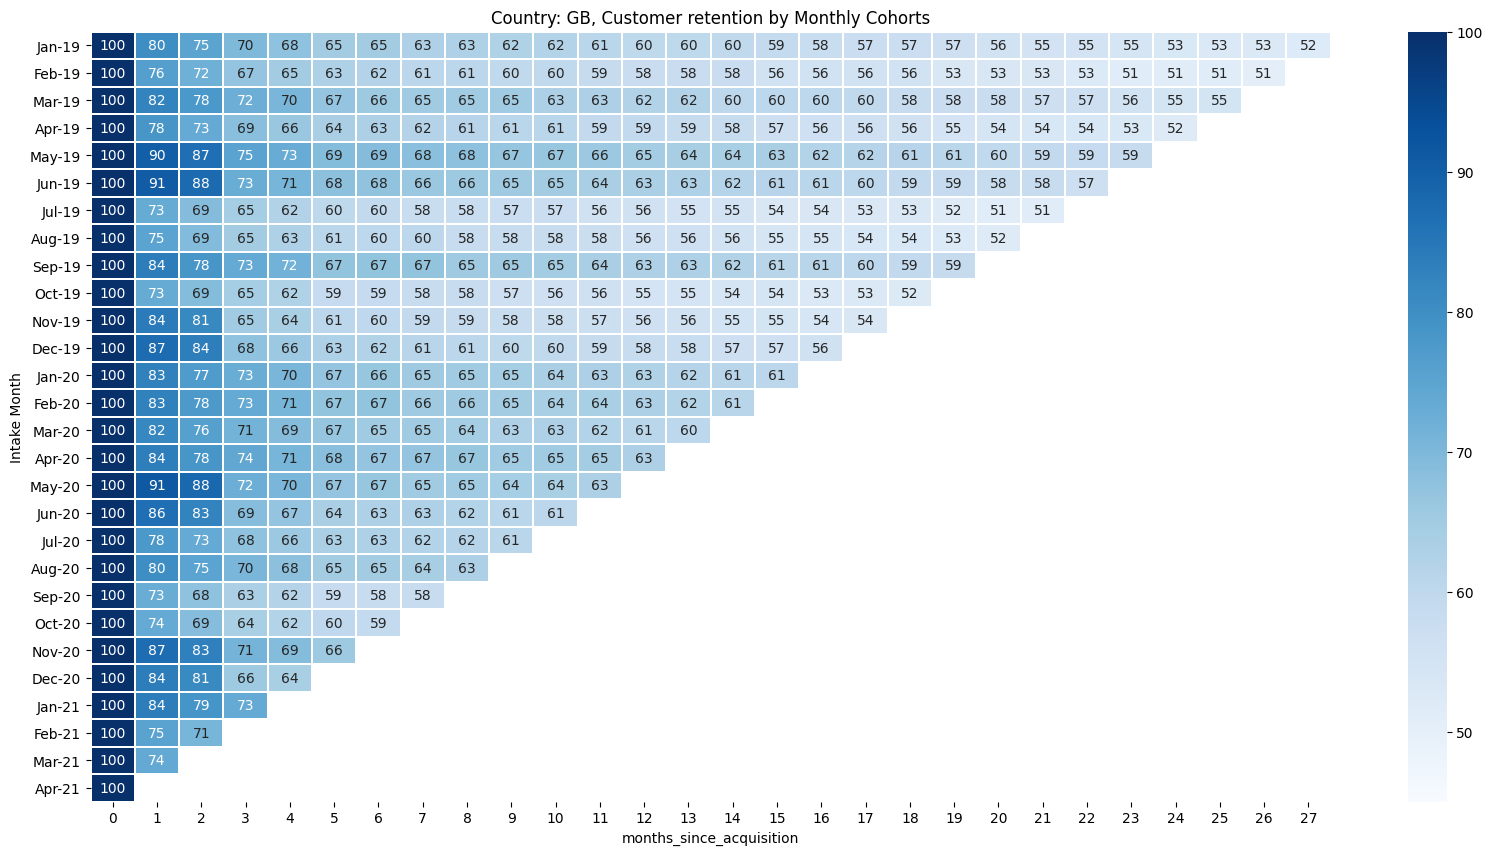

In [20]:
COUNTRY = 'GB'

tmp2 = df.groupby(['Country','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Country: {COUNTRY}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp2,
annot = True,
cmap = 'Blues',
# cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp2.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

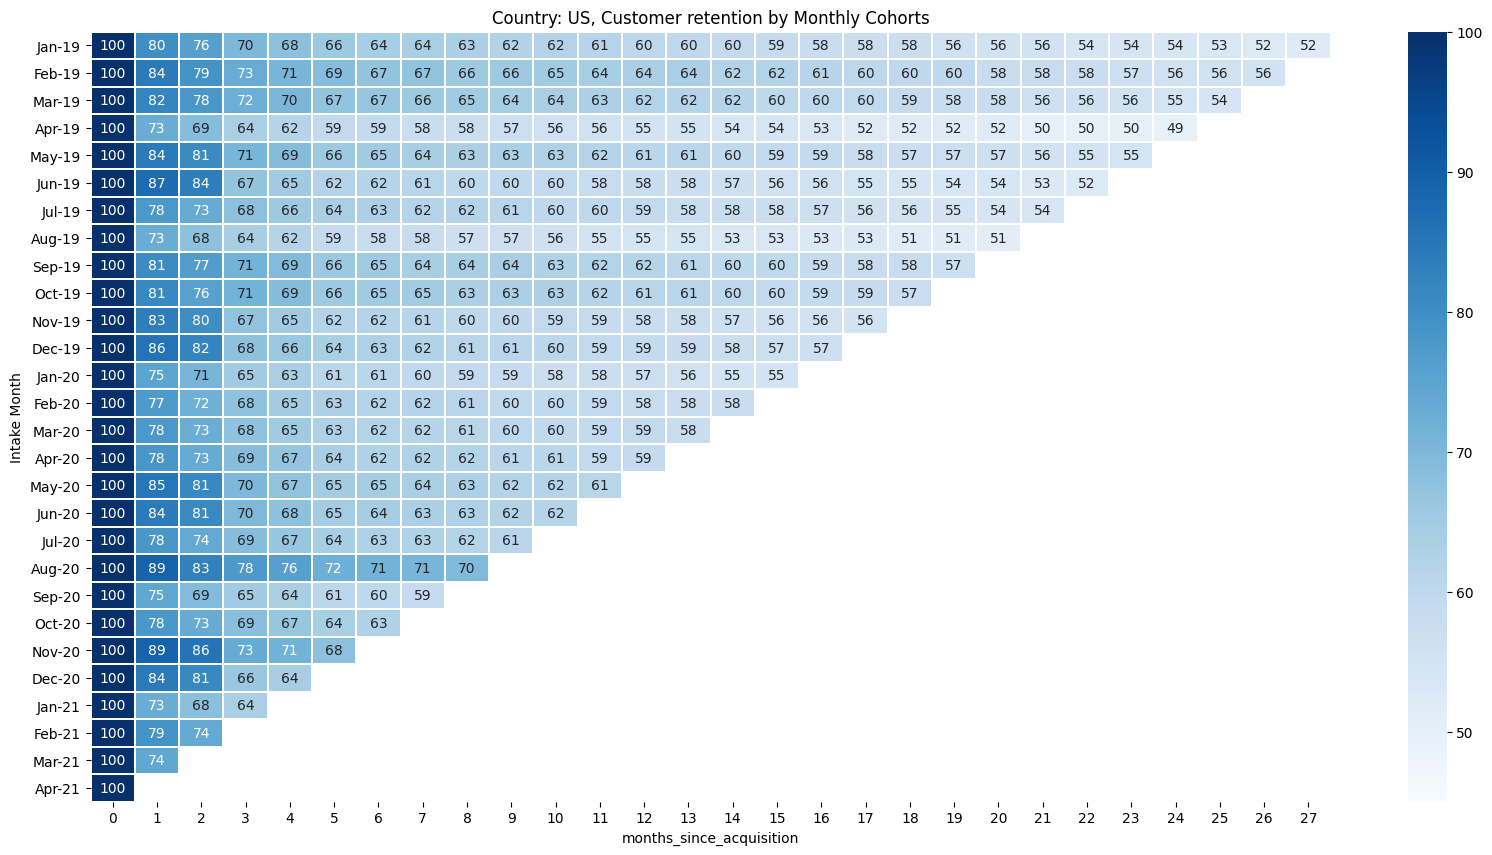

In [21]:
COUNTRY = 'US'

tmp2 = df.groupby(['Country','Intake Month','months_since_acquisition'])['retention_rate'].mean().reset_index()

tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
# Initialize inches palot figure
plt.figure(figsize=(20,10))

# Add a title
plt.title(f'Country: {COUNTRY}, Customer retention by Monthly Cohorts')

# Create the heatmap
seagreen_color = sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(data=tmp2,
annot = True,
cmap = 'Blues',
# cmap= seagreen_color,
vmin = 45, #the min of the dataset
vmax = 100.0,
fmt = '.0f',
linewidth = 0.3,
yticklabels=tmp2.index.strftime('%b-%y').to_list())
# sns.light_palette("seagreen", as_cmap=True)
plt.show();

retention rates patterns vary from one country to another

### retention rate vs Country & Product

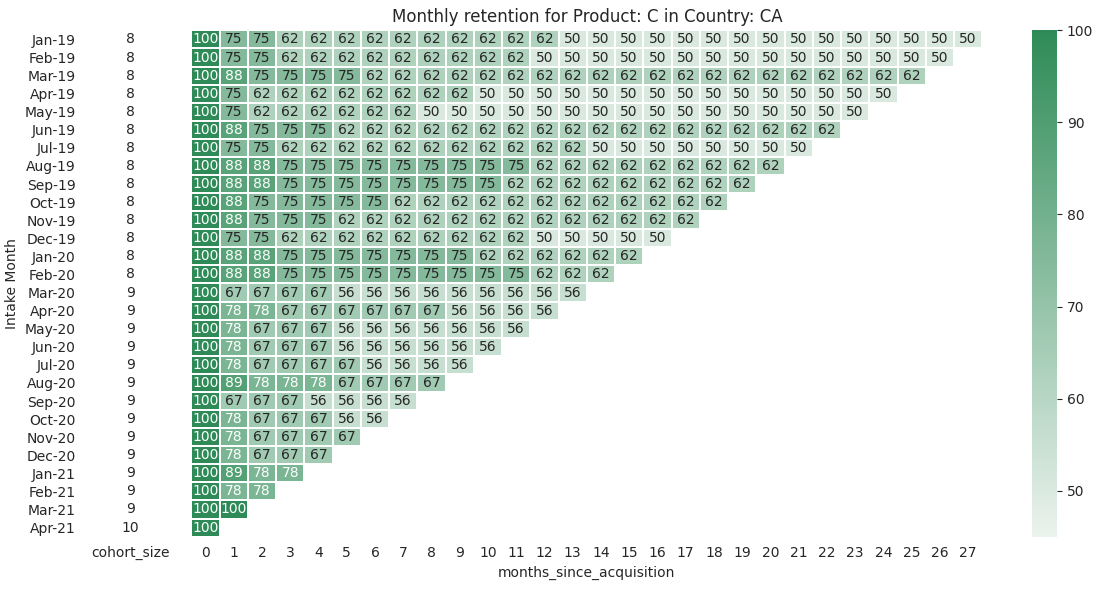

In [22]:
PRODUCT = 'C'
COUNTRY = 'CA'
TITLE=f"Monthly retention for Product: {PRODUCT} in Country: {COUNTRY}"

mask = (df.Country==COUNTRY)&(df.Product==PRODUCT)
# tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')

tmp = df.loc[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
cohort_size = pd.DataFrame(df[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='Cohort_size').iloc[:,0].astype(int)).rename(columns={0: 'cohort_size'})

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    seagreen_color = sns.light_palette("seagreen", as_cmap=True)

    sns.heatmap(data=tmp,
    annot = True,
    # cmap = 'Blues',
    cmap= seagreen_color,
    vmin = 45, #the min of the dataset
    vmax = 100.0,
    fmt = '.0f',
    linewidth = 0.3,
    yticklabels='',
    ax=ax[1])
    # sns.light_palette("seagreen", as_cmap=True)
    ax[1].set_title(TITLE, fontsize=12)
    ax[1].set(ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                yticklabels=tmp.index.strftime('%b-%y').to_list(),
                ax=ax[0])

    fig.tight_layout()

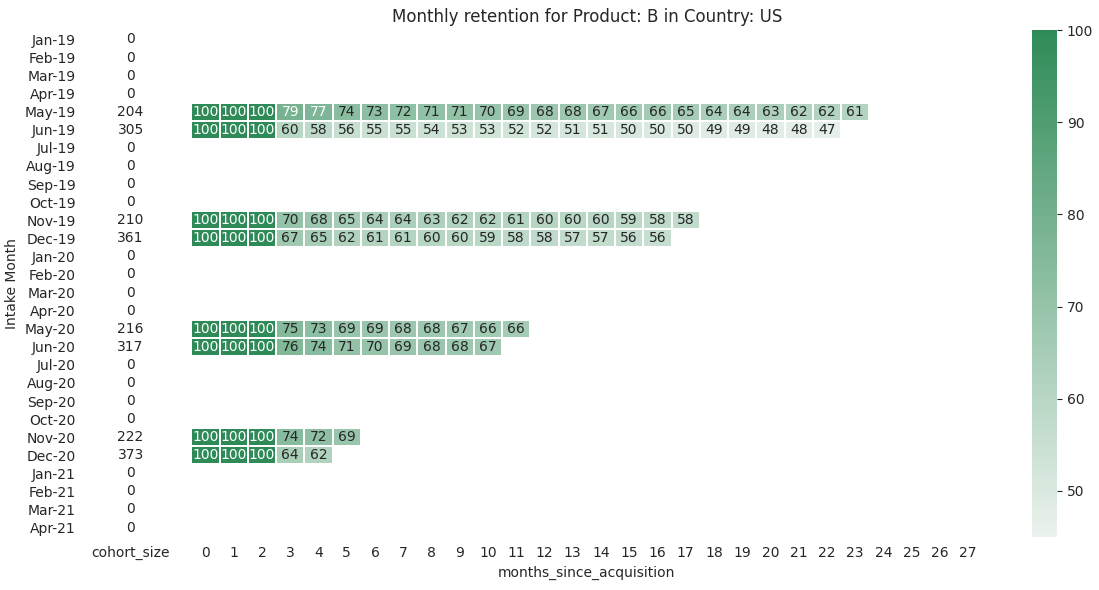

In [38]:
PRODUCT = 'B'
COUNTRY = 'US'
TITLE=f"Monthly retention for Product: {PRODUCT} in Country: {COUNTRY}"

mask = (df.Country==COUNTRY)&(df.Product==PRODUCT)
# tmp2 = tmp2[tmp2.Country==COUNTRY].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')

tmp = df.loc[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='retention_rate')
cohort_size = pd.DataFrame(df[mask].pivot(index='Intake Month', columns='months_since_acquisition', values='Cohort_size').iloc[:,0].astype(int)).rename(columns={0: 'cohort_size'})

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    seagreen_color = sns.light_palette("seagreen", as_cmap=True)

    sns.heatmap(data=tmp,
    annot = True,
    # cmap = 'Blues',
    cmap= seagreen_color,
    vmin = 45, #the min of the dataset
    vmax = 100.0,
    fmt = '.0f',
    linewidth = 0.3,
    yticklabels='',
    ax=ax[1])
    # sns.light_palette("seagreen", as_cmap=True)
    ax[1].set_title(TITLE, fontsize=12)
    ax[1].set(ylabel='')

    # cohort size
    white_cmap = mcolors.ListedColormap(['white'])

    sns.heatmap(cohort_size, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap,
                yticklabels=tmp.index.strftime('%b-%y').to_list(),
                ax=ax[0])

    fig.tight_layout()

For the same Product, the retention rate varies also slightly from one country to the other

### Net customers dependency with time

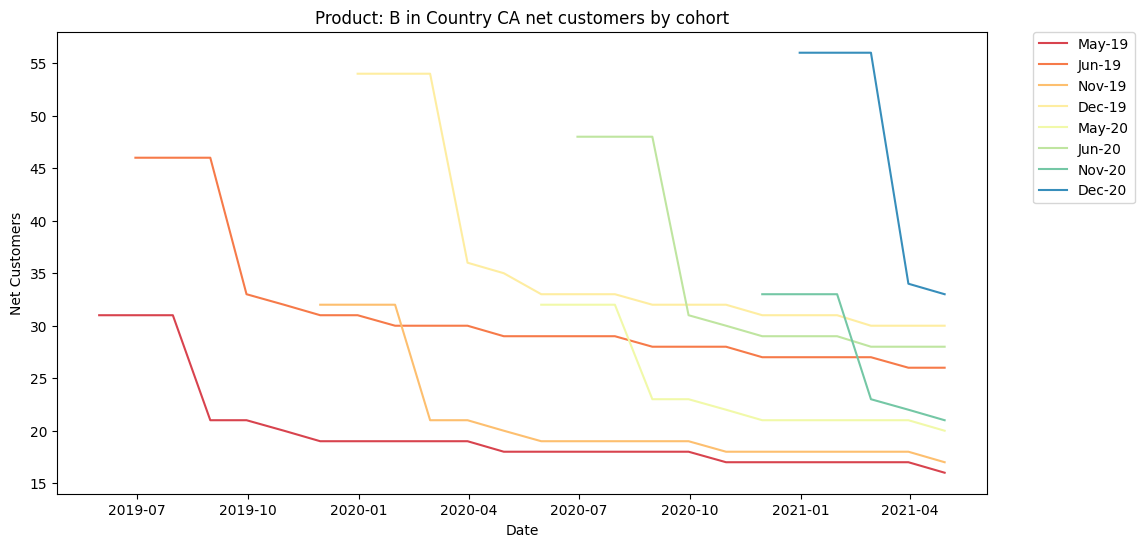

In [22]:
TITLE = f"Product: {PRODUCT} in Country {COUNTRY} net customers by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='Net Customers',palette='Spectral',ci=None)
g.set_title(TITLE)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

### retention rate vs Date of creation of cohort (absolute age cohort)

In [23]:
mini_df.head(3)

,Date,Intake Month,Country,Product,Net Customers,months_since_acquisition,churn_customers,Date_month,Date_year,Cohort_month,Cohort_year,Cohort_size,Cohort_name,retention_rate,diff_retention_rate,retention_rate_last,months_since_acquisition_last,Type
1624,2019-01-31,2019-01-31,CA,B,0,0,0.0,1,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1625,2019-02-28,2019-01-31,CA,B,0,1,0.0,2,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual
1626,2019-03-31,2019-01-31,CA,B,0,2,0.0,3,2019,1,2019,0,Jan-19,NaN,NaN,NaN,27,actual


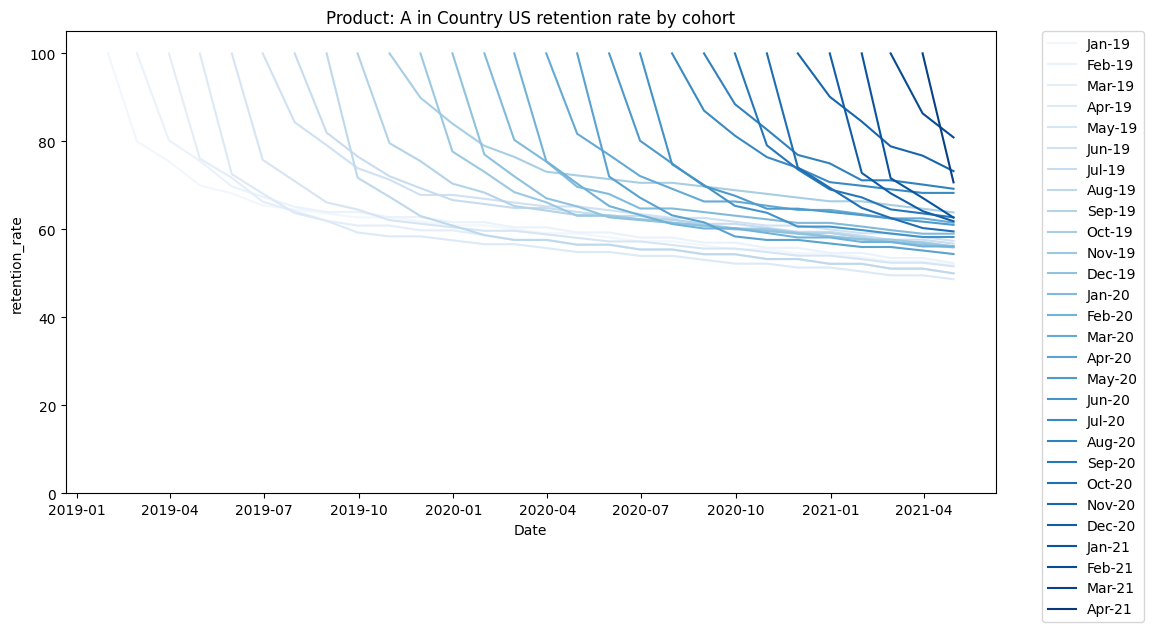

In [24]:
PRODUCT = 'A'
COUNTRY = 'US'

mask = (df['Product']==PRODUCT) & (df['Country']==COUNTRY) #(df_2['Intake Month']==INTAKE_MONTH) & 

mini_df = df.loc[mask,:]
# mini_df = df.copy()
mini_df.head()

TITLE = f"Product: {PRODUCT} in Country {COUNTRY} retention rate by cohort"
plt.figure(figsize=(12,6))
# g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Spectral')
g = sns.lineplot(data=mini_df[mini_df['Net Customers']>0],hue='Cohort_name',x='Date',y='retention_rate',palette='Blues',ci=None)
g.set_title(TITLE)
g.set(ylim=(0,105))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

We see that the retention rate seems to vary (in the graph below for B in CA, we see that the initial drop in retention rate is less the more to the right we are on avg)